In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances

In [2]:
def read_images(path):
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64,64))
    return img.astype(float)/255

(64, 64)

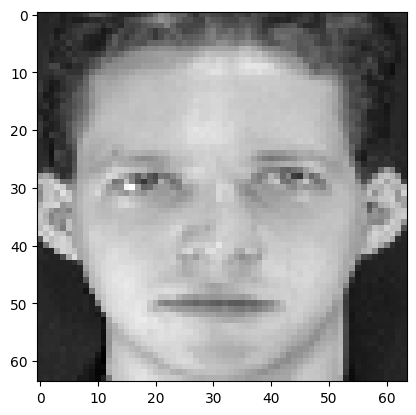

In [3]:
img = read_images('train/s1.1.tif')
plt.imshow(img, cmap='gray')
img = img.astype(float)
shape = img.shape
shape

In [4]:
def get_stacked_images(dir):
    image_array = []
    if dir == 'train/':
        trail = '.1.tif'
    else:
        trail = '.2.tif'
    for i in range(1,41):
        path = dir+'s'+str(i)+trail
        img = read_images(path)
        image_array.append(img.flatten())

    stacked_images = np.stack(image_array, axis=1)
    return stacked_images

In [5]:
def get_eigen_vector(covariance_matrix):
    eigen_vector, eigen_values, _ = np.linalg.svd(covariance_matrix)
    return eigen_vector, eigen_values

In [6]:
def get_eigen_projection(centered_image, eigen_vector, k):
    projection_values = np.dot( centered_image.T, eigen_vector[:,:k])
    return projection_values

In [7]:
def find_distance(_image, image_collection):
    return cosine_distances(_image, image_collection)


In [8]:
def get_image_projection(_img, mean_image, eigen_vectors, k):
    _img_centered = _img - mean_image
    projection = get_eigen_projection(_img_centered, eigen_vectors, k)
    return projection

In [16]:
def reproject_image(weights, eigenvectors, k):
    return np.dot(weights, eigenvectors[:,:k].T)

### Task -1 All images projected to low dimensional space

In [9]:
k = 99

In [10]:
stacked_images = get_stacked_images('train/')
mean_image = np.mean(stacked_images, axis=1).reshape(-1,1)
centered_image = stacked_images - mean_image
covariance_matrix = np.cov(centered_image)
eigen_vector, eigen_values = get_eigen_vector(covariance_matrix)


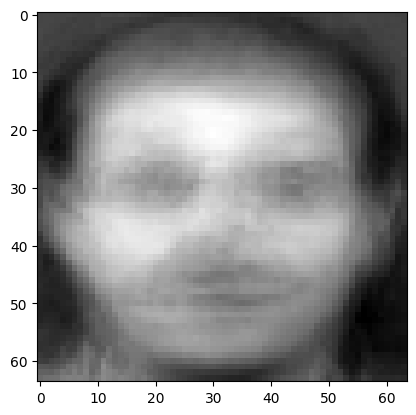

In [15]:
plt.imshow(mean_image.reshape(shape),cmap='gray')

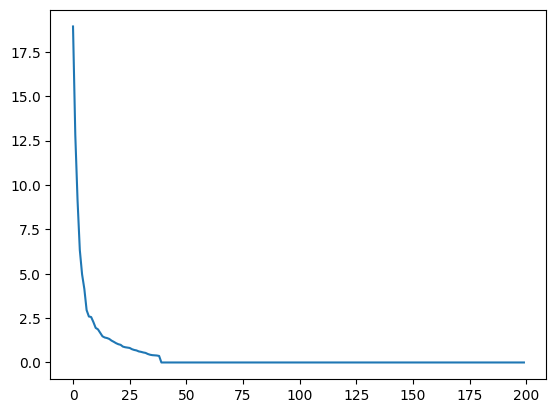

In [11]:
plt.plot(range(200), eigen_values[:200])

In [12]:
weights = get_eigen_projection(centered_image, eigen_vector, k)

### TASK -2 Matching for both training and testing data

In [13]:
train_images = get_stacked_images('train/')
train_eig_projection  = weights
correct_matches = 0
for i in range(train_images.shape[1]):
    img = train_images[:,i].reshape(train_images.shape[0],1)
    img_projection = get_image_projection(img, mean_image ,eigen_vector, k)
    dist = find_distance(img_projection, train_eig_projection)[0]
    index = np.argmin(dist)
    if index == i:
        correct_matches += 1
    else:
        print( "mismatch at test-index:", i)

print("**** Accuracy train: *****", correct_matches/train_images.shape[1])

**** Accuracy train: ***** 1.0


In [14]:
test_images = get_stacked_images('test/')
train_eig_projection  = weights
correct_matches = 0
for i in range(test_images.shape[1]):
    img = test_images[:,i].reshape(test_images.shape[0],1)
    img_projection = get_image_projection(img, mean_image ,eigen_vector, k)
    dist = find_distance(img_projection, train_eig_projection)[0]
    index = np.argmin(dist)
    # print(dist)
    if index == i:
        correct_matches += 1
    else:
        print( "mismatch at test-index:", i)

print("**** Accuracy Test: *****", correct_matches/test_images.shape[1])

mismatch at test-index: 22
mismatch at test-index: 34
**** Accuracy Test: ***** 0.95


### Extras Re-projection

In [18]:
_image_10 = weights[10,:].reshape(1,99)

In [23]:
_projecte_img_10  = reproject_image(_image_10, eigen_vector, 99)
x = _projecte_img_10 + mean_image

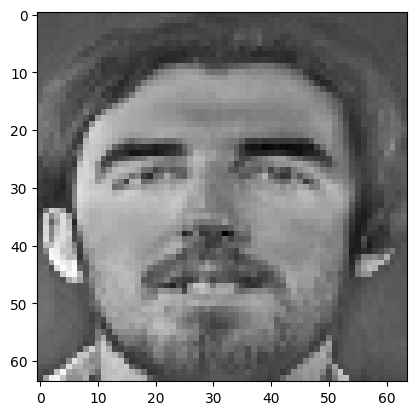

In [24]:
plt.imshow(_projecte_img_10.reshape(shape), cmap='gray')

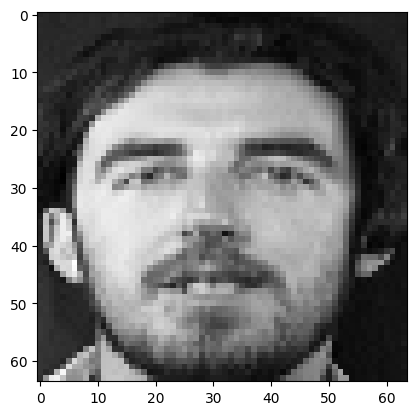

In [25]:
plt.imshow(stacked_images[:,10].reshape(shape), cmap='gray')